Reconocimiento Facial:

**Objetivo:** Desarrollar un sistema básico de seguridad utilizando visión por computadora que permita reconocer rostros autorizados y alertar cuando haya una intrusión.

**Caso de uso:**
Sistema para controlar el acceso a una casa/oficina mediante cámara web o grabaciones.

In [1]:
!pip install imutils
!pip install mediapipe

In [2]:
import cv2
import os
import imutils
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

In [3]:
nombrePersona = 'Juan'
dataPath = '/content/Data'
personPath = os.path.join(dataPath, nombrePersona)

os.makedirs(personPath, exist_ok=True)
print('Carpeta creada o existente:', personPath)

Carpeta creada o existente: /content/Data/Juan


In [4]:
uploaded = files.upload()

Saving carlos.jpg to carlos.jpg
Saving juan.jpg to juan.jpg


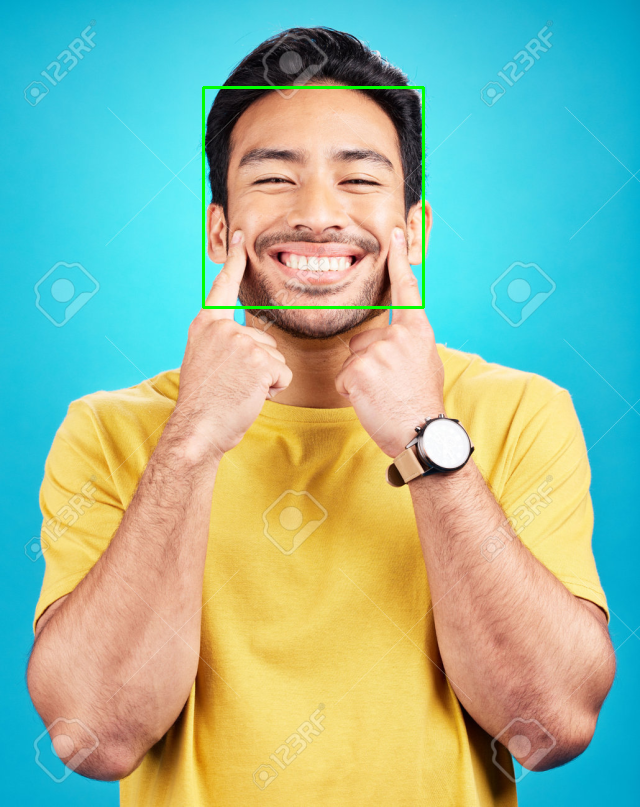

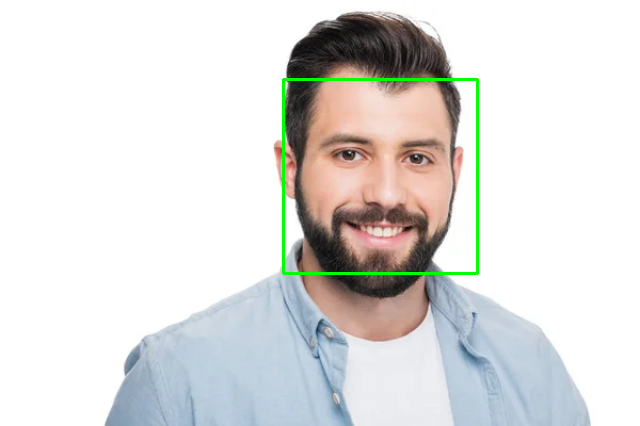

2 rostros capturados y guardados.


In [5]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
count = 0

for filename in uploaded.keys():
    frame = cv2.imread(filename)
    frame = imutils.resize(frame, width=640)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    auxFrame = frame.copy()

    faces = faceClassif.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        rostro = auxFrame[y:y + h, x:x + w]
        rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)
        image_path = os.path.join(personPath, f'rostro_{count}.jpg')
        cv2.imwrite(image_path, rostro)
        count += 1

    cv2_imshow(frame)

print(f'{count} rostros capturados y guardados.')

In [6]:
from cv2.face import LBPHFaceRecognizer_create

labels = []
facesData = []
label = 0
people = os.listdir(dataPath)

for name in people:
    personPath = os.path.join(dataPath, name)
    for fileName in os.listdir(personPath):
        imgPath = os.path.join(personPath, fileName)
        img = cv2.imread(imgPath, 0)
        facesData.append(img)
        labels.append(label)
    label += 1

face_recognizer = LBPHFaceRecognizer_create()
face_recognizer.train(facesData, np.array(labels))
face_recognizer.write('modeloLBPH.xml')

print("Modelo entrenado y guardado como modeloLBPH.xml")

Modelo entrenado y guardado como modeloLBPH.xml


Saving sofia.jpg to sofia.jpg


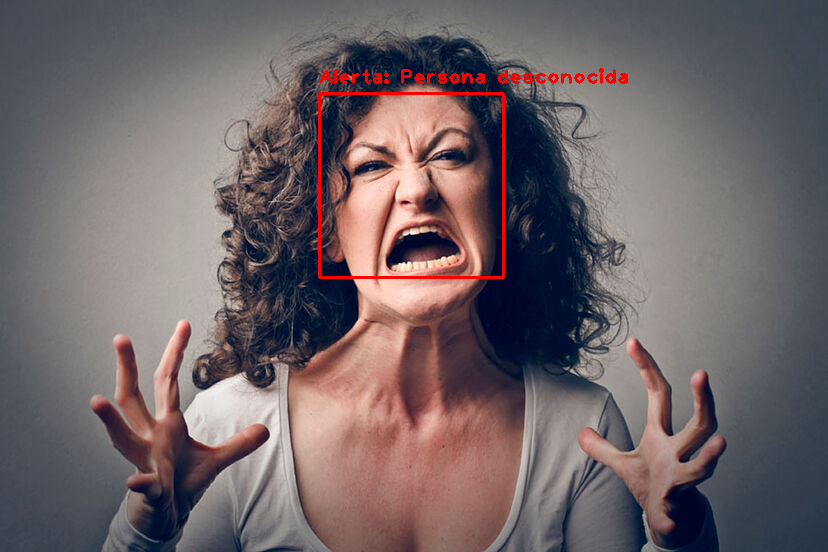

In [7]:
face_recognizer.read('modeloLBPH.xml')
uploaded = files.upload()

for filename in uploaded.keys():
    frame = cv2.imread(filename)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceClassif.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        rostro = gray[y:y+h, x:x+w]
        rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)

        result = face_recognizer.predict(rostro)
        label = result[0]
        confidence = result[1]

        if confidence < 70:
            name = people[label]
            color = (0, 255, 0)
            msg = f"Reconocido: {name}"
        else:
            name = "Desconocido"
            color = (0, 0, 255)
            msg = "Alerta: Persona desconocida"

        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, msg, (x, y-10), 1, 1.3, color, 2)

    cv2_imshow(frame)